## Imports

In [1]:
import torch
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt
import os
import warnings

warnings.simplefilter("ignore", category=UserWarning)

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(device)

mps


## Environment

In [13]:
import ale_py

env = gym.make("ALE/BasicMath-v5", full_action_space=True, obs_type="rgb", 
               frameskip=4, repeat_action_probability=0.25, render_mode = "human")

In [14]:
env.reset()

(array([[[ 24,  59, 157],
         [ 24,  59, 157],
         [ 24,  59, 157],
         ...,
         [ 24,  59, 157],
         [ 24,  59, 157],
         [ 24,  59, 157]],
 
        [[ 24,  59, 157],
         [ 24,  59, 157],
         [ 24,  59, 157],
         ...,
         [ 24,  59, 157],
         [ 24,  59, 157],
         [ 24,  59, 157]],
 
        [[ 24,  59, 157],
         [ 24,  59, 157],
         [ 24,  59, 157],
         ...,
         [ 24,  59, 157],
         [ 24,  59, 157],
         [ 24,  59, 157]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
  

In [15]:
env.action_space

Discrete(18)

In [16]:
env.observation_space

Box(0, 255, (210, 160, 3), uint8)

In [17]:
env.render()

In [ ]:
episodes = 5
for i in range(1, episodes+1):
    obs = env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action = env.action_space.sample()
        obs, obs2, reward, done, info = env.step(action)
        score += reward
    print(f"Episode: {i} Score: {score}")

env.close()

## Train Model

In [19]:
env = DummyVecEnv([lambda: env])

In [20]:
log_path = os.path.join("Training", "logs")
model = PPO("CnnPolicy", env, verbose=1, tensorboard_log = log_path, device=device)

Using mps device
Wrapping the env in a VecTransposeImage.


In [21]:
model.learn(total_timesteps=50000)

Logging to Training/logs/PPO_4
-----------------------------
| time/              |      |
|    fps             | 16   |
|    iterations      | 1    |
|    time_elapsed    | 122  |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 16          |
|    iterations           | 2           |
|    time_elapsed         | 250         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012435807 |
|    clip_fraction        | 0.102       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.88       |
|    explained_variance   | 0.00766     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0102      |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00746    |
|    value_loss           | 0.15        |
-----------------------------------------
---

Use "tensorboard --logdir logs/" in the Training terminal to get to tensorboard

## Save Model

In [22]:
ppo_path = os.path.join("Training", "Saved Models", "PPO_Driving_Model")

In [23]:
model.save(ppo_path)

In [24]:
del model

In [25]:
model = PPO.load(ppo_path, env)

Wrapping the env in a VecTransposeImage.


## Test Model

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

In [27]:
episodes = 25

ep = []
points = []

for i in range(1, episodes+1):
    obs = env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        score += reward        

    ep.append(i)
    points.append(score)
    
    print(f"Episode: {i} Score: {score}")

env.close()

Episode: 1 Score: [0.]
Episode: 2 Score: [0.]
Episode: 3 Score: [0.]
Episode: 4 Score: [0.]
Episode: 5 Score: [0.]
Episode: 6 Score: [0.]
Episode: 7 Score: [0.]
Episode: 8 Score: [0.]
Episode: 9 Score: [0.]
Episode: 10 Score: [0.]
Episode: 11 Score: [0.]
Episode: 12 Score: [0.]
Episode: 13 Score: [0.]
Episode: 14 Score: [0.]
Episode: 15 Score: [0.]
Episode: 16 Score: [0.]
Episode: 17 Score: [0.]
Episode: 18 Score: [0.]
Episode: 19 Score: [0.]
Episode: 20 Score: [0.]
Episode: 21 Score: [0.]
Episode: 22 Score: [0.]
Episode: 23 Score: [0.]
Episode: 24 Score: [0.]
Episode: 25 Score: [0.]


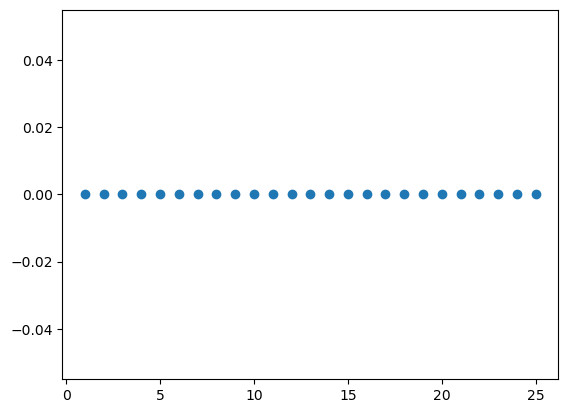

In [28]:
plt.scatter(ep, points)